# The Kasiski Test
The Vigenère cipher remained secure for hundreds of years. It defeated the previous cryptanalysis methods of using frequency analysis to determine the key. The strength of the system relied on having a keyword, preferably of a decent length, that changed that effectively rotated the key throughout the message. However, there is still a weakness in the system that took until 1863 for *Friedrich Kasiski* to discover that it was possible to determine the length of the keyword, and from there the rest becomes easy.

## Repeated Ciphertext

Suppose you had the following fragment of plaintext:

`...on a plane. The plane is due...`

and you encrypted it using the Vigenère cipher and the following 3 keywords:

```
keyword: water
keystream:  w a t e r w a t e r w a t e r w a t e r w
plaintext:  o n a p l a n e t h e p l a n e i s d u e
ciphertext: K N T T C W N X X Y A P E E E A I L H L A
```

You can see in this example, the word `plane` in the appears twice in the plaintext, but once encrypted it appears as two different ciphertext fragments, `TCWNX` and  `PEEEA`. This is a characteristic of many polyaphabetic ciphers and is precisely what Vigenère was designed to do. 

However, look what happen when using the keyword `MILK`
 
```
keyword: milk
keystream:  m i l k m i l k m i l k m i l k m i l k m
plaintext:  o n a p l a n e t h e p l a n e i s d u e
ciphertext: A V L Z X I Y O F P D Z X I Y O U A O E Q
```

In this case, using the keyword `MILK` caused the word `plane` to be enciphered to the ciphertext `ZXIYO` both times. We see this happen again when using the keyword `HOSPITAL`
 
```
keyword: hospital
keystream:  h o s p i t a l h o s p i t a l h o s p i
plaintext:  o n a p l a n e t h e p l a n e i s d u e
ciphertext: V B S E T T N P A V W E T T N P P G V J M
```

This time plane is mapped to `ETTNP` both times. 

If one of the major strengths of Vigenère is that it can disguise repeated plaintext fragments, this seems like a major flaw! Any pattern or repetition may reveal information about the plaintext or key. Let's examine what may be causing this to happen, and what we can learn about the key when it does.

## Aligning Keywords and Plaintext

In both cases above, the repeated ciphertext is a direct result of the keyword aligning in the same position over the word `plane` both times the word `plane` appeared in the plaintext. This alignment wouldn't have happened if the keyword was 3, 5, 6, 7, or any longer than 8 characters long. Some trial and error would show that keywords of length 1, 2, 4, and 8 *will* cause the keyword to line up in the same position. What's so special about keywords that are 1, 2, 4 or 8 characters long? Those numbers are all related to the distance between repeated plaintext fragments!

```
plaintext: o n a p l a n e t h e p l a n e i s d u e
                 0 1 2 3 4 5 6 7 8 
```

We can see that the start of the repeated plaintext word `plane` is 8 characters away. If the keyword were 1, 2, 4, or 8 characters long, then the keywords will align in the same position relative to the repeated plaintext fragment. 

For example, in the following message the repeated plaintext of `times` is 20 characters apart:

```
plaintext: b  e  s  t  o  f  t  i  m  e  s  i  t  w  a  s  t  h  e  w  o  r  s  t  o  f  t  i  m  e  s
                             0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
```
Using a key of length 1, 2, 4, 5, 10, or 20 would result in the word `times` being enciphered the same way both times. 

These repeated ciphertext fragments reveal a shortlist of potential keyword lengths for a Vigenère ciphertext. The longer a repeated fragment, the less likely the repetition was by chance, so typically fragments should be of length 4 or more to retain confidence in your work. One repetition alone isn't enough to determine the keyword length for certain. However if the same fragment repeats multiple times, or you discover multiple cases of repeating fragments of ciphertext, you can begin to narrow down the possible lengths of the keyword further.

## Multiple Repeating Fragments

Suppose you intercepted the following ciphertext:

> JAKXQ SWECW MMJBK TQMCM LWCXJ BNEWS XKRBO IAOBI NOMLJ GUIMH YTACF ICVOE BGOVC WYRCV KXJZV SMRXY VPOVB UBIJH OVCVK RXBOE ASZVR AOXQS WECVO QJHSG ROXWJ MCXQF OIRGZ VRAOJ RJOMB DBMVS CIESX MBDBM VSKRM GYFHA KXQSW ECWME UWXHD QDMXB KPUCN HWIWF NFCKA SKXNF DLJBY RNOBI YFSQN HRIYV IWRQS WCGKC BHRVN SSWYF SQNTS ZNWCT AWWIB SFIWW CTAWW IWWXI RGKRN LZIAW WIWHK PNFBS ASVIE SXMBD BMVSK RMGYC NGKPU CNHWI WFNFC KASKX NFDLJ BYRNO BIYFS QNHRI NBQMW SOVBO IWCVB INWCT AWWIO WFIRG ZVRAO WNJOR RGZVR AORRB OMBDB MVSOP NJORR GZVRA OXQWB XNSXM BDBMV SPMOH OIWWC TAWWI

If we were to find repeated fragments of ciphertext in the message, especially if the fragments are particularly long, it could be a sign that the keyword used is a factor of the distance between the repeating ciphertext fragments. It is not guaranteed, but the chances of the repetition being random is very low.

Fortunately, we do find some repeated fragments:
```
WCTAWWI (x2): 12 characters apart
YFSQN (x2): 28 characters apart
```

Finding just these repeats indicates that the keyword used must be a factor of 12 (1, 2, 3, 4, 6, or 12) and 28 (1, 2, 4, 7, 14, or 28), leaving only the possibilities of: 1, 2, or 4. Assuming the message was actually enciphered using Vigenère, that would eliminate the key length of 1 (which would just be a Caesar cipher) that leaves us with the choice of either 2 or 4. We will assume the larger value and see what that information might provide you.

## Grouping Letters
Now that we've assumed that the keyword has length of 4, let's try to use that information to deduce the key.

If the keyword length is 4, that means that every letter in the plaintext was enciphered using one of 4 key letters. For example:

```
keyword letter: 12341 23412 34123 41234 12341
     plaintext: JAKXQ SWECW MMJBK TQMCM LWCXJ
```

If we were to group all the ciphertext letters together that were enciphered with the same letter of the keyword, we'll have 4 groups of letters each of which essentially came from a monoalphabetic cipher. And since we know Vigenère works by adding the value of the key to the value of the plaintext letter, we can treat each group as if it were enciphering using the Caesar cipher. That is very helpful since you know how to find the key for a ciphertext created with the Caesar cipher using frequency analysis and chi-squared scoring.

Group 1:
> JQCJQ LJWRA NJMAC BCCJM VBJCX ARQCJ RJQRR RBVEB VMHQC UDXUW NANJN YNYRC BNYNN ABWAW RNAWN AEBVM NUWNA NJNYN NWBCN AORRN RRRBV NRRQN BVOWA

In [1]:
import sys
from seaborn import barplot
sys.path.insert(0, '../../')
from toolkit import letterFrequency,textBlock, vigenereDecipher

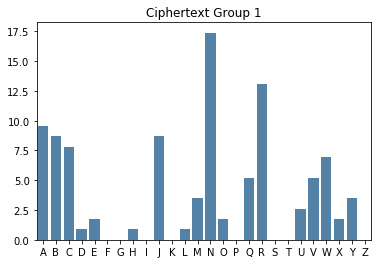

In [2]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = letterFrequency( 'JQCJQLJWRANJMACBCCJMVBJCXARQCJRJQRRRBVEBVMHQCUDXUWNANJNYNYRCBNYNNABWAWRNAWNAEBVMNUWNANJNYNNWBCNAORRNRRRBVNRRQNBVOWA' )
barplot(labels, values, color='steelblue').set_title('Ciphertext Group 1');

Group 2
> ASWBM WBSBO OGHCV GWVZR PUHVB SASVH OMFGA JDSSD SGASW WQBCI FSFBO FHVQG HSFTW WSWWW GLWHF SSDSG GCIFS FBOFH BSOVW WWGAJ GABDS JGAWS DSHWW

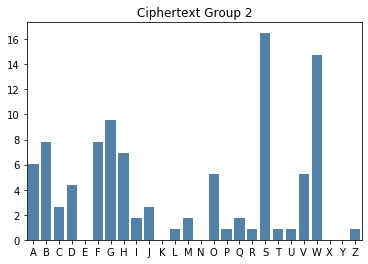

In [3]:
values = letterFrequency( 'ASWBMWBSBOOGHCVGWVZRPUHVBSASVHOMFGAJDSSDSGASWWQBCIFSFBOFHVQGHSFTWWSWWWGLWHFSSDSGGCIFSFBOFHBSOVWWWGAJGABDSJGAWSDSHWW' )
barplot(labels, values, color='steelblue').set_title('Ciphertext Group 2');

Group 3
> KWMKC CNXOB MUYFO OYKVX OBOKO ZOWOS XCOZO OBCXB KYKWM XDKNW CKDYB SRISK RSSSC WFCWX KZWKB VXBKY KNWCK DYBSR QOIBC WFZOO ZOOBO OZOBX BPOCW

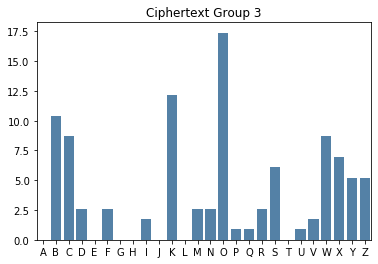

In [4]:
values = letterFrequency( 'KWMKCCNXOBMUYFOOYKVXOBOKOZOWOSXCOZOOBCXBKYKWMXDKNWCKDYBSRISKRSSSCWFCWXKZWKBVXBKYKNWCKDYBSRQOIBCWFZOOZOOBOOZOBXBPOCW' )
barplot(labels, values, color='steelblue').set_title('Ciphertext Group 3');

Group 4
> XEMTM XEKII LITIE VRXSY VIVRE VXEQG WXIVJ MMIMM RFXEE HMPHF KXLRI QIWWC VWQZT IITII RIIPS IMMRC PHFKX LRIQI MVWIT IIVWR VRMMP RVXXM MMITI

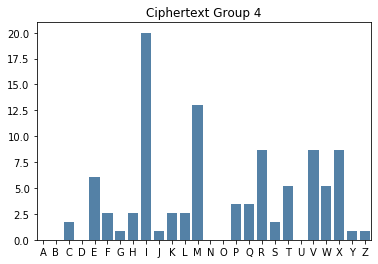

In [5]:
values = letterFrequency( 'XEMTMXEKIILITIEVRXSYVIVREVXEQGWXIVJMMIMMRFXEEHMPHFKXLRIQIWWCVWQZTIITIIRIIPSIMMRCPHFKXLRIQIMVWITIIVWRVRMMPRVXXMMMITI' )
barplot(labels, values, color='steelblue').set_title('Ciphertext Group 4');

Even though there's not a lot of characters in each smaller group, it's relatively straight forward to see the key from each bar chart.

| Group # | Key # | Keyword Letter|
|:-------:|:-----:|:-------------:|
|1        | 9 | J |
|2| 14 | O |
|3| 11 | K |
|4| 4  | E |

We can see that the keyword appears to be `JOKE`. We can verify by attempting to decipher the message using the Vigenère cipher.

In [6]:
ciphertext = 'JAKXQ SWECW MMJBK TQMCM LWCXJ BNEWS XKRBO IAOBI NOMLJ GUIMH YTACF ICVOE BGOVC WYRCV KXJZV SMRXY VPOVB UBIJH OVCVK RXBOE ASZVR AOXQS WECVO QJHSG ROXWJ MCXQF OIRGZ VRAOJ RJOMB DBMVS CIESX MBDBM VSKRM GYFHA KXQSW ECWME UWXHD QDMXB KPUCN HWIWF NFCKA SKXNF DLJBY RNOBI YFSQN HRIYV IWRQS WCGKC BHRVN SSWYF SQNTS ZNWCT AWWIB SFIWW CTAWW IWWXI RGKRN LZIAW WIWHK PNFBS ASVIE SXMBD BMVSK RMGYC NGKPU CNHWI WFNFC KASKX NFDLJ BYRNO BIYFS QNHRI NBQMW SOVBO IWCVB INWCT AWWIO WFIRG ZVRAO WNJOR RGZVR AORRB OMBDB MVSOP NJORR GZVRA OXQWB XNSXM BDBMV SPMOH OIWWC TAWWI'
print( vigenereDecipher(ciphertext, 'JOKE'))

amathematicianaphysicistandanengineerareeachaskedtoprovetheassertionthatalloddnumbersgreaterthanoneareprimethemathematiciansaysthreeisprimefiveisprimesevenisprimeandsobymathematicalinductionalloddnumbersgreaterthanoneareprimethephysicistsaysthreeisprimefiveisprimesevenisprimenineisanexperimentalerrorelevenisprimeandsoyesalloddnumbersgreaterthanoneareprimetheengineersaysthreeisprimefiveisprimesevenisprimenineisprimeelevenisprimethirteenisprimefifteenisprime


which, once you add in the spacing yields the following (kind of funny?) joke:

> a mathematician a physicist and an engineer are each asked to prove the assertion that all odd numbers greater than one are prime. the mathematician says three is prime five is prime seven is prime and so by mathematical induction all odd numbers greater than one are prime. the physicist says three is prime five is prime seven is prime nine is an experimental error eleven is prime and so yes all odd numbers greater than one are prime. the engineer says three is prime five is prime seven is prime nine is prime eleven is prime thirteen is prime fifteen is prime...

So, you can see that knowing the length of the keyword by using the Kasiski test is good enough to deduce the key, and then determine the corresponding plaintext.

## Limitations
It is worth noting that there are few additional steps that could be taken that would thwart the Kasiski test, however they each have their own pros/cons:

* Use a longer keyword
  * If we use a longer keyword, we will reduce the number of possible times our keyword may line up in the same position on repeated plaintext fragments.
  * A common way to do this is a long passage that is common for people to have memorized: the Declaration of Independence, company mission statement, school fight song, etc. 
    * The downside of this approach is that it may be easily guessable.
* Use a random keyword that is as long as the message
  * It is very difficult to come up with a truly random keyword!
  * Even if you did, it is very difficult to securely transmit it to the receiver of the message. 
    * If you had a way to deliver this long random keyword without an evesdropper seeing it, we wouldn't need encryption in the first place!

This key exchange problem is very pesky, and wasn't solved until the 20th century.

## Exercise for the reader

To speed this process up, it would be beneficial to use Python functions to implement some of the more manual tasks.
* Divide the ciphertext up into the number of groups identified by the Kasiski test
* Determine the largest shared factor between a list of numbers, also known as the greatest common divisor
* [Hard] Identify repeating fragments of ciphertext and calculate how far apart they are in the message.